# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns


random.seed(42)
seed = np.random.seed(42)

In [2]:
import re
import itertools

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [3]:
print("Сиды фиксируем для того, чтобы была вопроизводимость результатов")

Сиды фиксируем для того, чтобы была вопроизводимость результатов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [5]:
df_train.sample(10, random_state=seed)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [6]:
pd.concat([df_test.head(5), df_test.tail(5)])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [8]:
df_test.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [9]:
train_nan_counts = df_train.isnull().sum()
feat_wnan_train = {name for name, val in zip(train_nan_counts.index, train_nan_counts) if val > 0 }
train_nan_counts.to_frame(name="NaN counts")

,NaN counts
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,202
engine,202


In [10]:
test_nan_counts = df_test.isnull().sum()
feat_wnan_test = {name for name, val in zip(test_nan_counts.index, test_nan_counts) if val > 0 }
test_nan_counts.to_frame(name="NaN counts")

,NaN counts
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,19
engine,19


In [11]:
print("features with nan values:")
print(feat_wnan_train.union(feat_wnan_test))

features with nan values:
{'torque', 'max_power', 'engine', 'seats', 'mileage'}


Как можно увидеть по принту выше, в 5 колонках есть значения с пропусками, как в трейне, так и тесте

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [12]:
train_features = df_train.columns.tolist()
train_features.remove("selling_price")
unique_rows = df_train.drop_duplicates(subset=train_features, inplace=False, keep="first")
print(f"duplicate_rows count: {len(df_train)- len(unique_rows)}")

duplicate_rows count: 1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [13]:
unique_row_idx = set(unique_rows.index.to_list())
duplicate_rows = df_train[~df_train.index.isin(unique_row_idx)]
duplicate_rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [14]:
df_train.drop_duplicates(subset=train_features, inplace=True, keep="first")

In [15]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [16]:
df_train.reset_index(inplace=True, drop=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [17]:
def get_all_units(column):
    pattern = re.compile("[A-Za-z]+")
    def _get_units(x):
        if isinstance(x, float):
            return {}
        units_extracted = pattern.findall(str(x))
        units_lower = map(lambda x: x.lower(), units_extracted)
        return units_lower
    unitlist = column.apply(_get_units)
    units_flat = itertools.chain.from_iterable(unitlist)
    return set(units_flat)

def standardize_torque(val):
    if isinstance(val, float):
        return val
    merged_string = "".join(re.split(r'\s+|,', val)).lower()
    tilda_removed = merged_string.replace("~","-")
    standardized_string = re.sub(r"(at|/(?!-))", "@", tilda_removed)
    return standardized_string

Посмотрим, какие вообще единицы измерения встречаются в этой колонке:

In [18]:
get_all_units(df_train.torque)

{'at', 'kgm', 'nm', 'rpm'}

"at" можно заменить на "@" для унификации. "~" заменим на "-", уберем пробелы. Теперь попробуем учесть все различные форматы.

In [126]:
def process_torque(df):
    kg_to_n = 9.80665
    re1 = re.compile("^(?P<torque>\d+(?:\.\d+)?)(?P<unit>nm|kgm|)(?:@(?P<rpm>\d+(?:(?:-|\+\/-)\d+)?)(?:rpm)?)?$")
    re2 = re.compile("^(?P<torque>\d+(?:\.\d+)?)@(?P<rpm>\d+(?:\+?\/?-?\d+)?)\((?P<unit>nm|kgm|)")
    re3 = re.compile("^(?P<torque>\d+)(?P<unit>nm|kgm|).*@(?P<rpm>\d+)")
    re_list = (re1, re2, re3)
    standardized_column = df.torque.map(standardize_torque)
    torque = []
    max_rpm = []
    for val in standardized_column:
        if val is np.nan:
            torque.append(val)
            max_rpm.append(val)
            continue
        for re_expr in re_list:
            match = re_expr.match(val)
            if match:
                break
        else:
            raise ValueError(f"following string not parsed '{val}''")
        torque_val = float(match.group("torque"))
        units = match.group("unit")
        # записи без единиц измерения считаем в ньютонах
        if units == "kgm":
            torque_val *= kg_to_n
        rpm_line = match.group("rpm")
        if rpm_line:
            try:
                rpm = float(rpm_line)
            except ValueError:
                lval, sep, rval = re.split(r"(\D+)", rpm_line)
                # берем более низкое значение rpm, т.к. кажется,
                # то же значение torque на низких оборотах лучше, чем на высоких
                if sep == "-":
                    rpm = float(lval)
                elif sep == "+/-":
                    rpm = float(lval) - float(rval)
                else:
                    raise ValueError(f"cannot parse rpm line: {rpm_line}")
        else:
            rpm = np.nan
        torque.append(torque_val)
        max_rpm.append(rpm)
    return torque, max_rpm
    

In [113]:
def clean_feature(entry):
    if entry is np.nan:
        return entry
    try:
        val, *_ = entry.strip().split(" ")
    except AttributeError:
        raise ValueError(f"val is not string:{entry}")
    if not re.match(r"\d+(?:.d+)?", val):
        return np.nan
    return float(val)


def clean_up_data(dataframe):
    for fname in ("mileage", "engine", "max_power"):
        dataframe[fname] = dataframe[fname].map(clean_feature)
    torque, max_rpm = process_torque(dataframe)
    dataframe["torque"] = torque
    dataframe["max_rpm"] = max_rpm
    return dataframe

In [21]:
df_train = clean_up_data(df_train)
df_test = clean_up_data(df_test)

In [22]:
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,1500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,1750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.750000,5.0,4000.0


In [23]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260.0,7.0,1800.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260.0,5.0,1500.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,172.0,5.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,200.0,5.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,96.0,5.0,3000.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [24]:
df_train.fillna(value=df_train.median(numeric_only=True), inplace=True)
df_test.fillna(value=df_train.median(numeric_only=True), inplace=True)

In [25]:
train_nan_counts = df_train.isnull().sum()
feat_wnan_train = {name for name, val in zip(train_nan_counts.index, train_nan_counts) if val > 0 }
train_nan_counts.to_frame(name="NaN counts")

,NaN counts
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [26]:
test_nan_counts = df_test.isnull().sum()
feat_wnan_train = {name for name, val in zip(test_nan_counts.index, test_nan_counts) if val > 0 }
test_nan_counts.to_frame(name="NaN counts")

,NaN counts
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [27]:
print("Не очевидно, что есть линейная зависимость между количеством мест и стоимостью."
      "- минивен с большим количеством мест скорее будет стоить дороже среднего седана,"
      "но среди двухместных машин много элитных автомобилей с высокой стоимостью")

Не очевидно, что есть линейная зависимость между количеством мест и стоимостью.- минивен с большим количеством мест скорее будет стоить дороже среднего седана,но среди двухместных машин много элитных автомобилей с высокой стоимостью


In [28]:
df_train.engine = df_train.engine.astype("int64")
df_test.engine = df_test.engine.astype("int64")

df_train.seats = df_train.seats.astype("int64")
df_test.seats = df_test.seats.astype("int64")

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

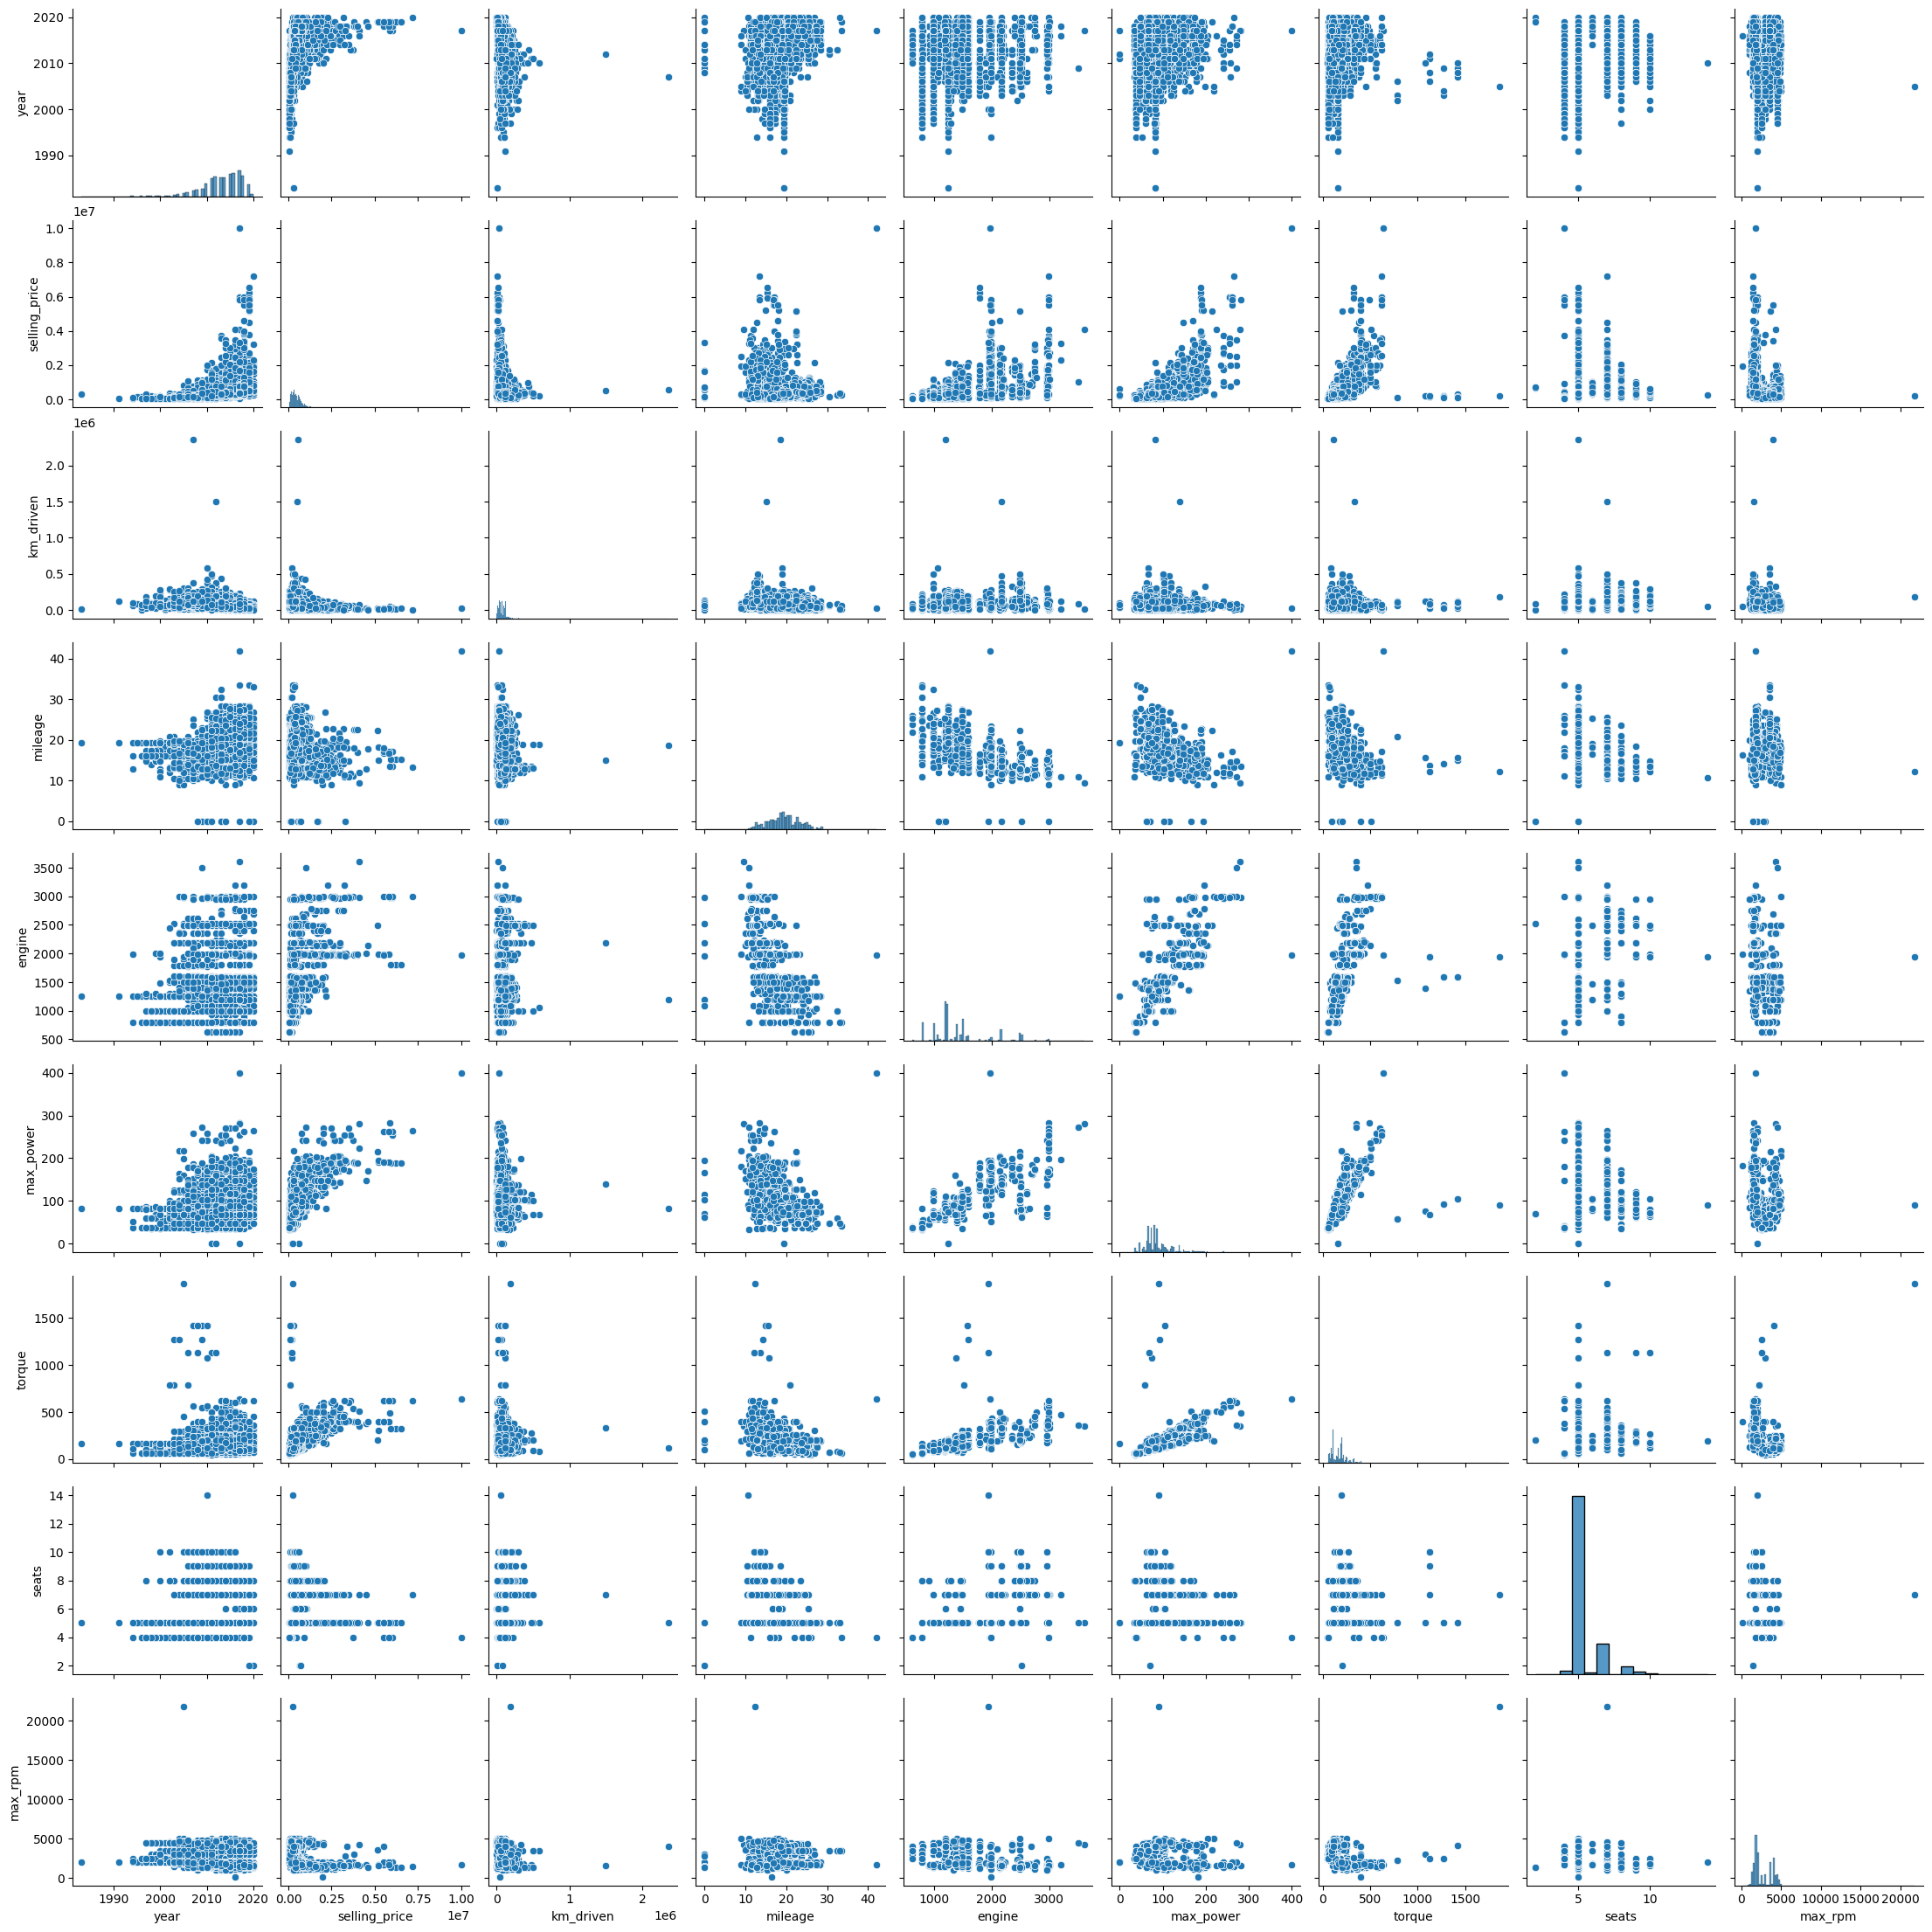

In [29]:
sns.pairplot(data=df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Из графиков совместного распределения можно заметить, что цена продажи положительно коррелирует с годом производства машины, максимальным крутящим моментом и максимальной мощностью двигателя. Менее выражена  отрицательная корреляция цены с числом пройденных миль и положительная - с мощностью двигателя

Из признаков заметно коррелированы друг с другом мощность двигателя, максимальная мощность и крутящий момент. 
Кроме того, заметна отрицательная корреляция между числом пройденных миль и объемом двигателя. 
Видимо, более мощные (и дорогие) машины продают с меньшим пробегом

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

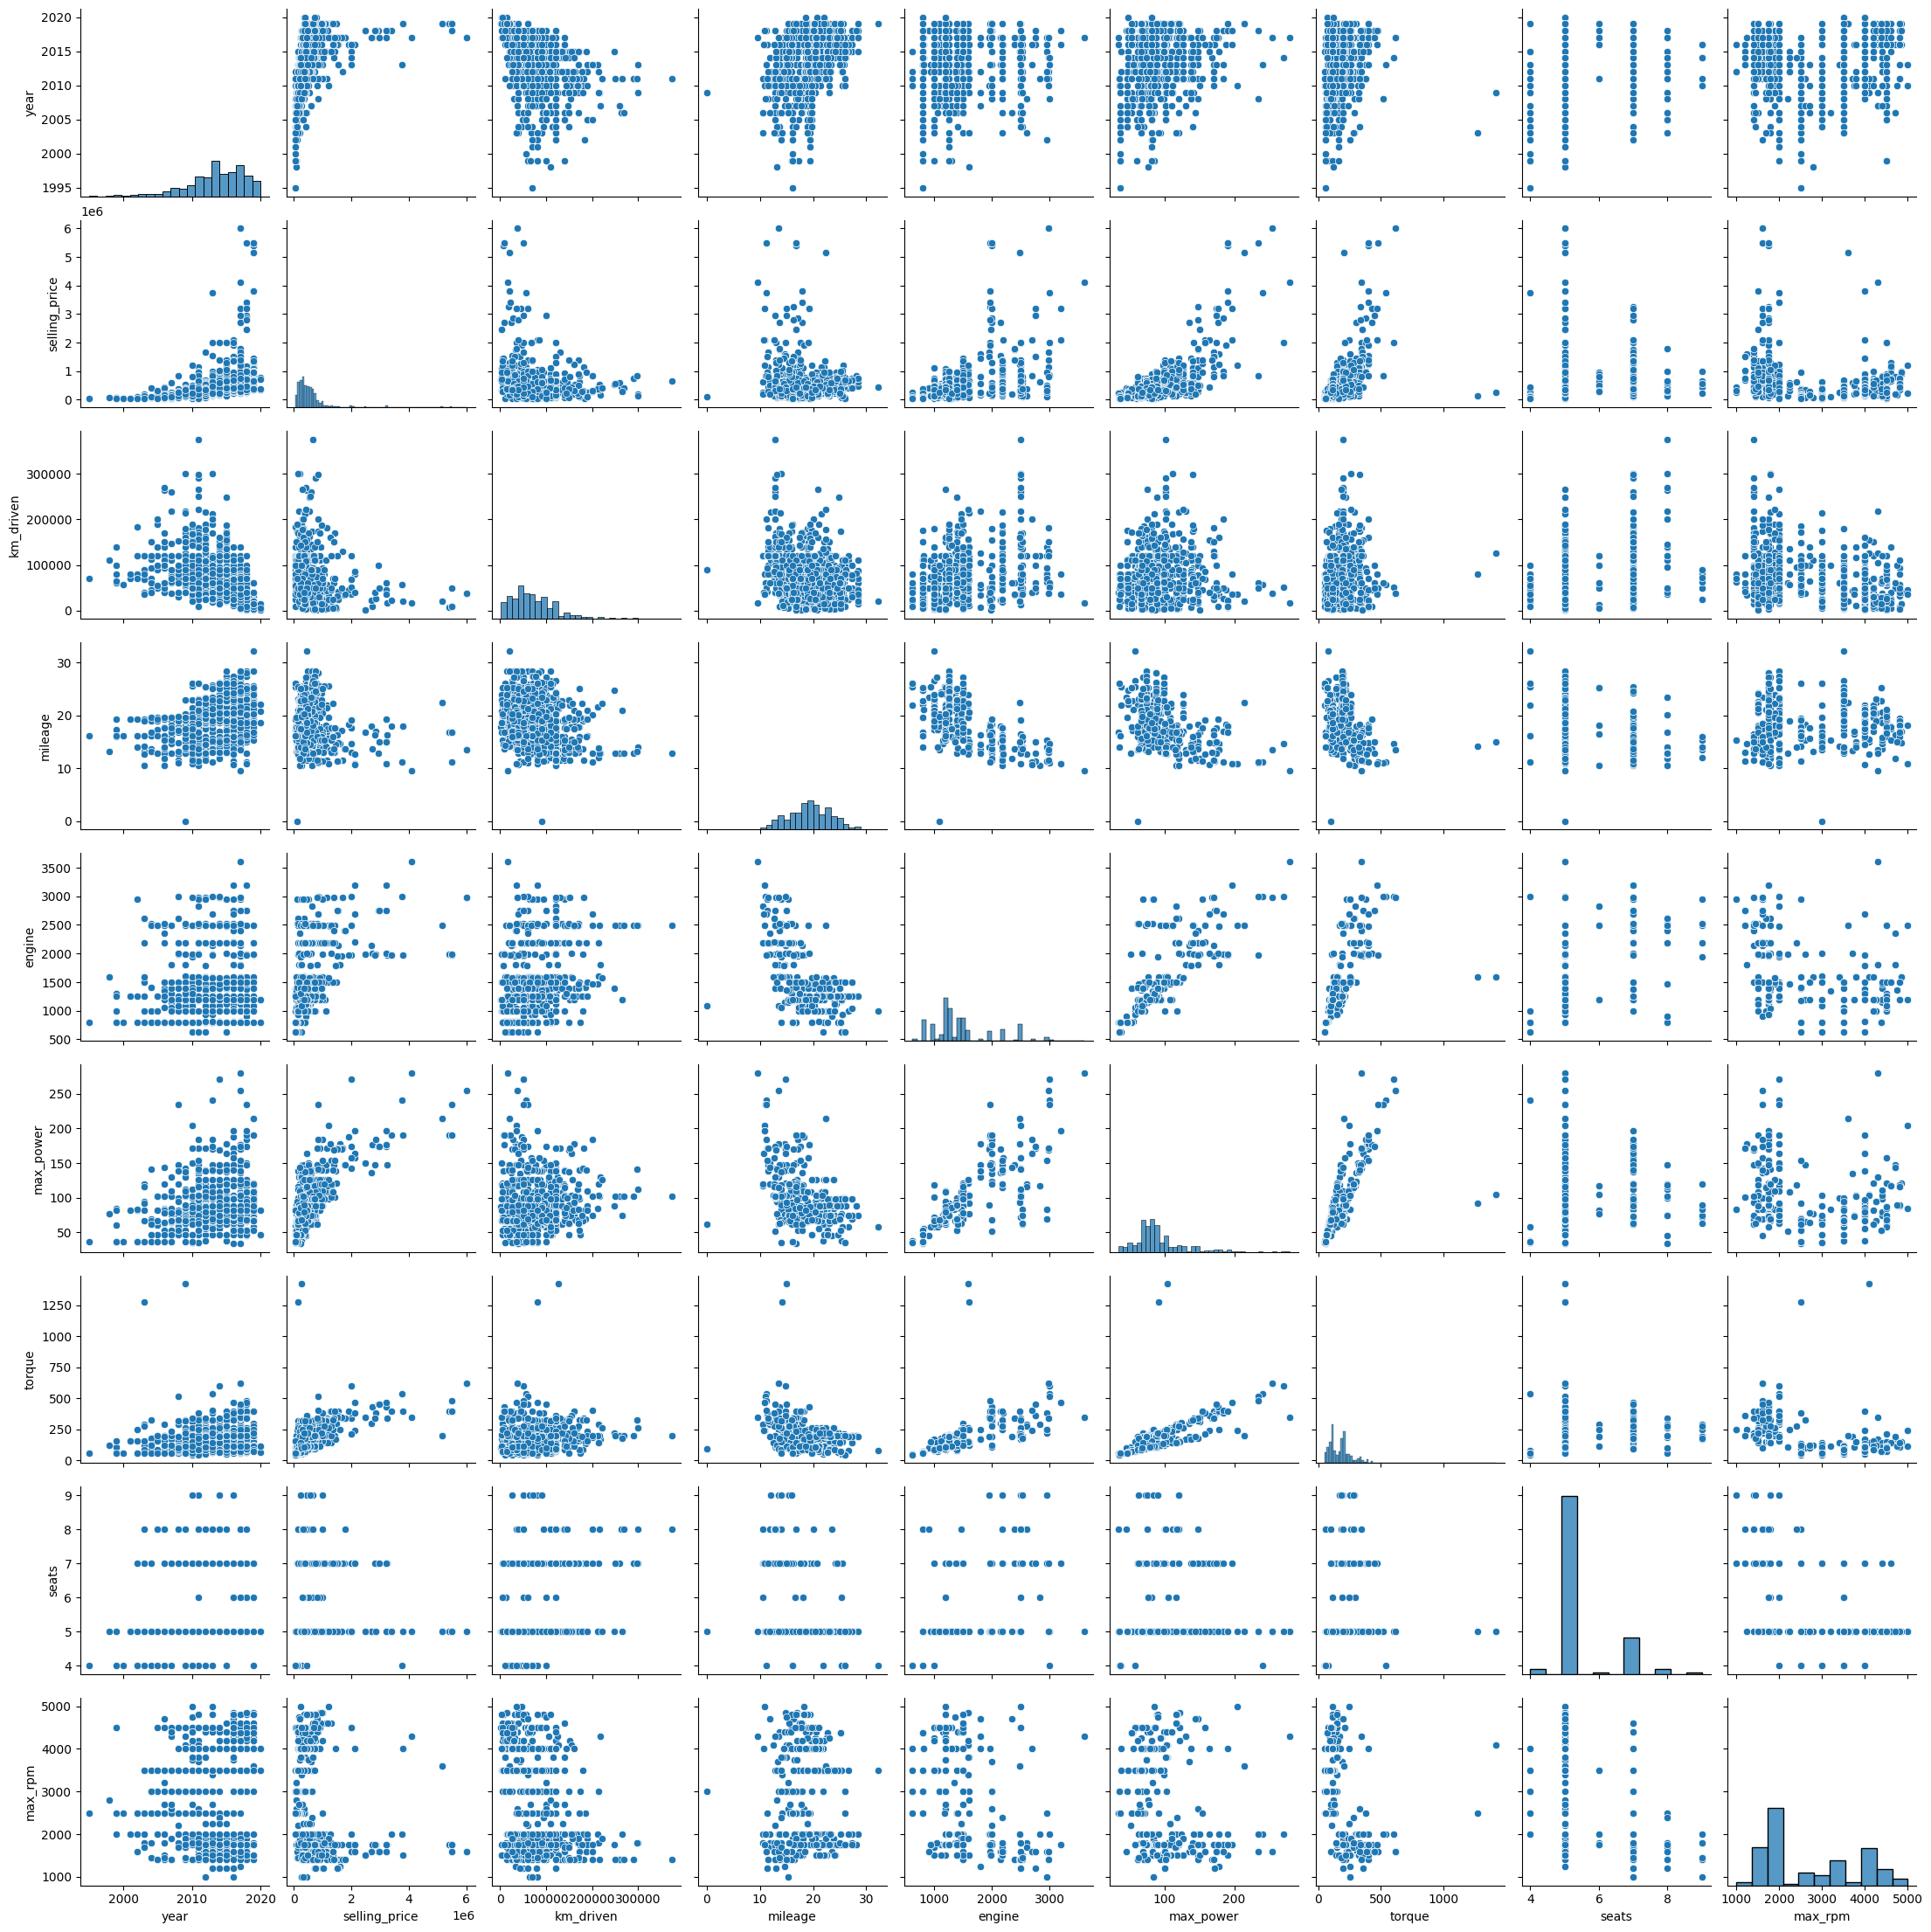

In [30]:
sns.pairplot(data=df_test)

Данные на трейне и тесте похожи, не заметно сильных отличий в значениях корреляции признаков, но отрицательная корреляция между пробегом машины и ценой более выражена.
Посмотрим на распределения вместе:

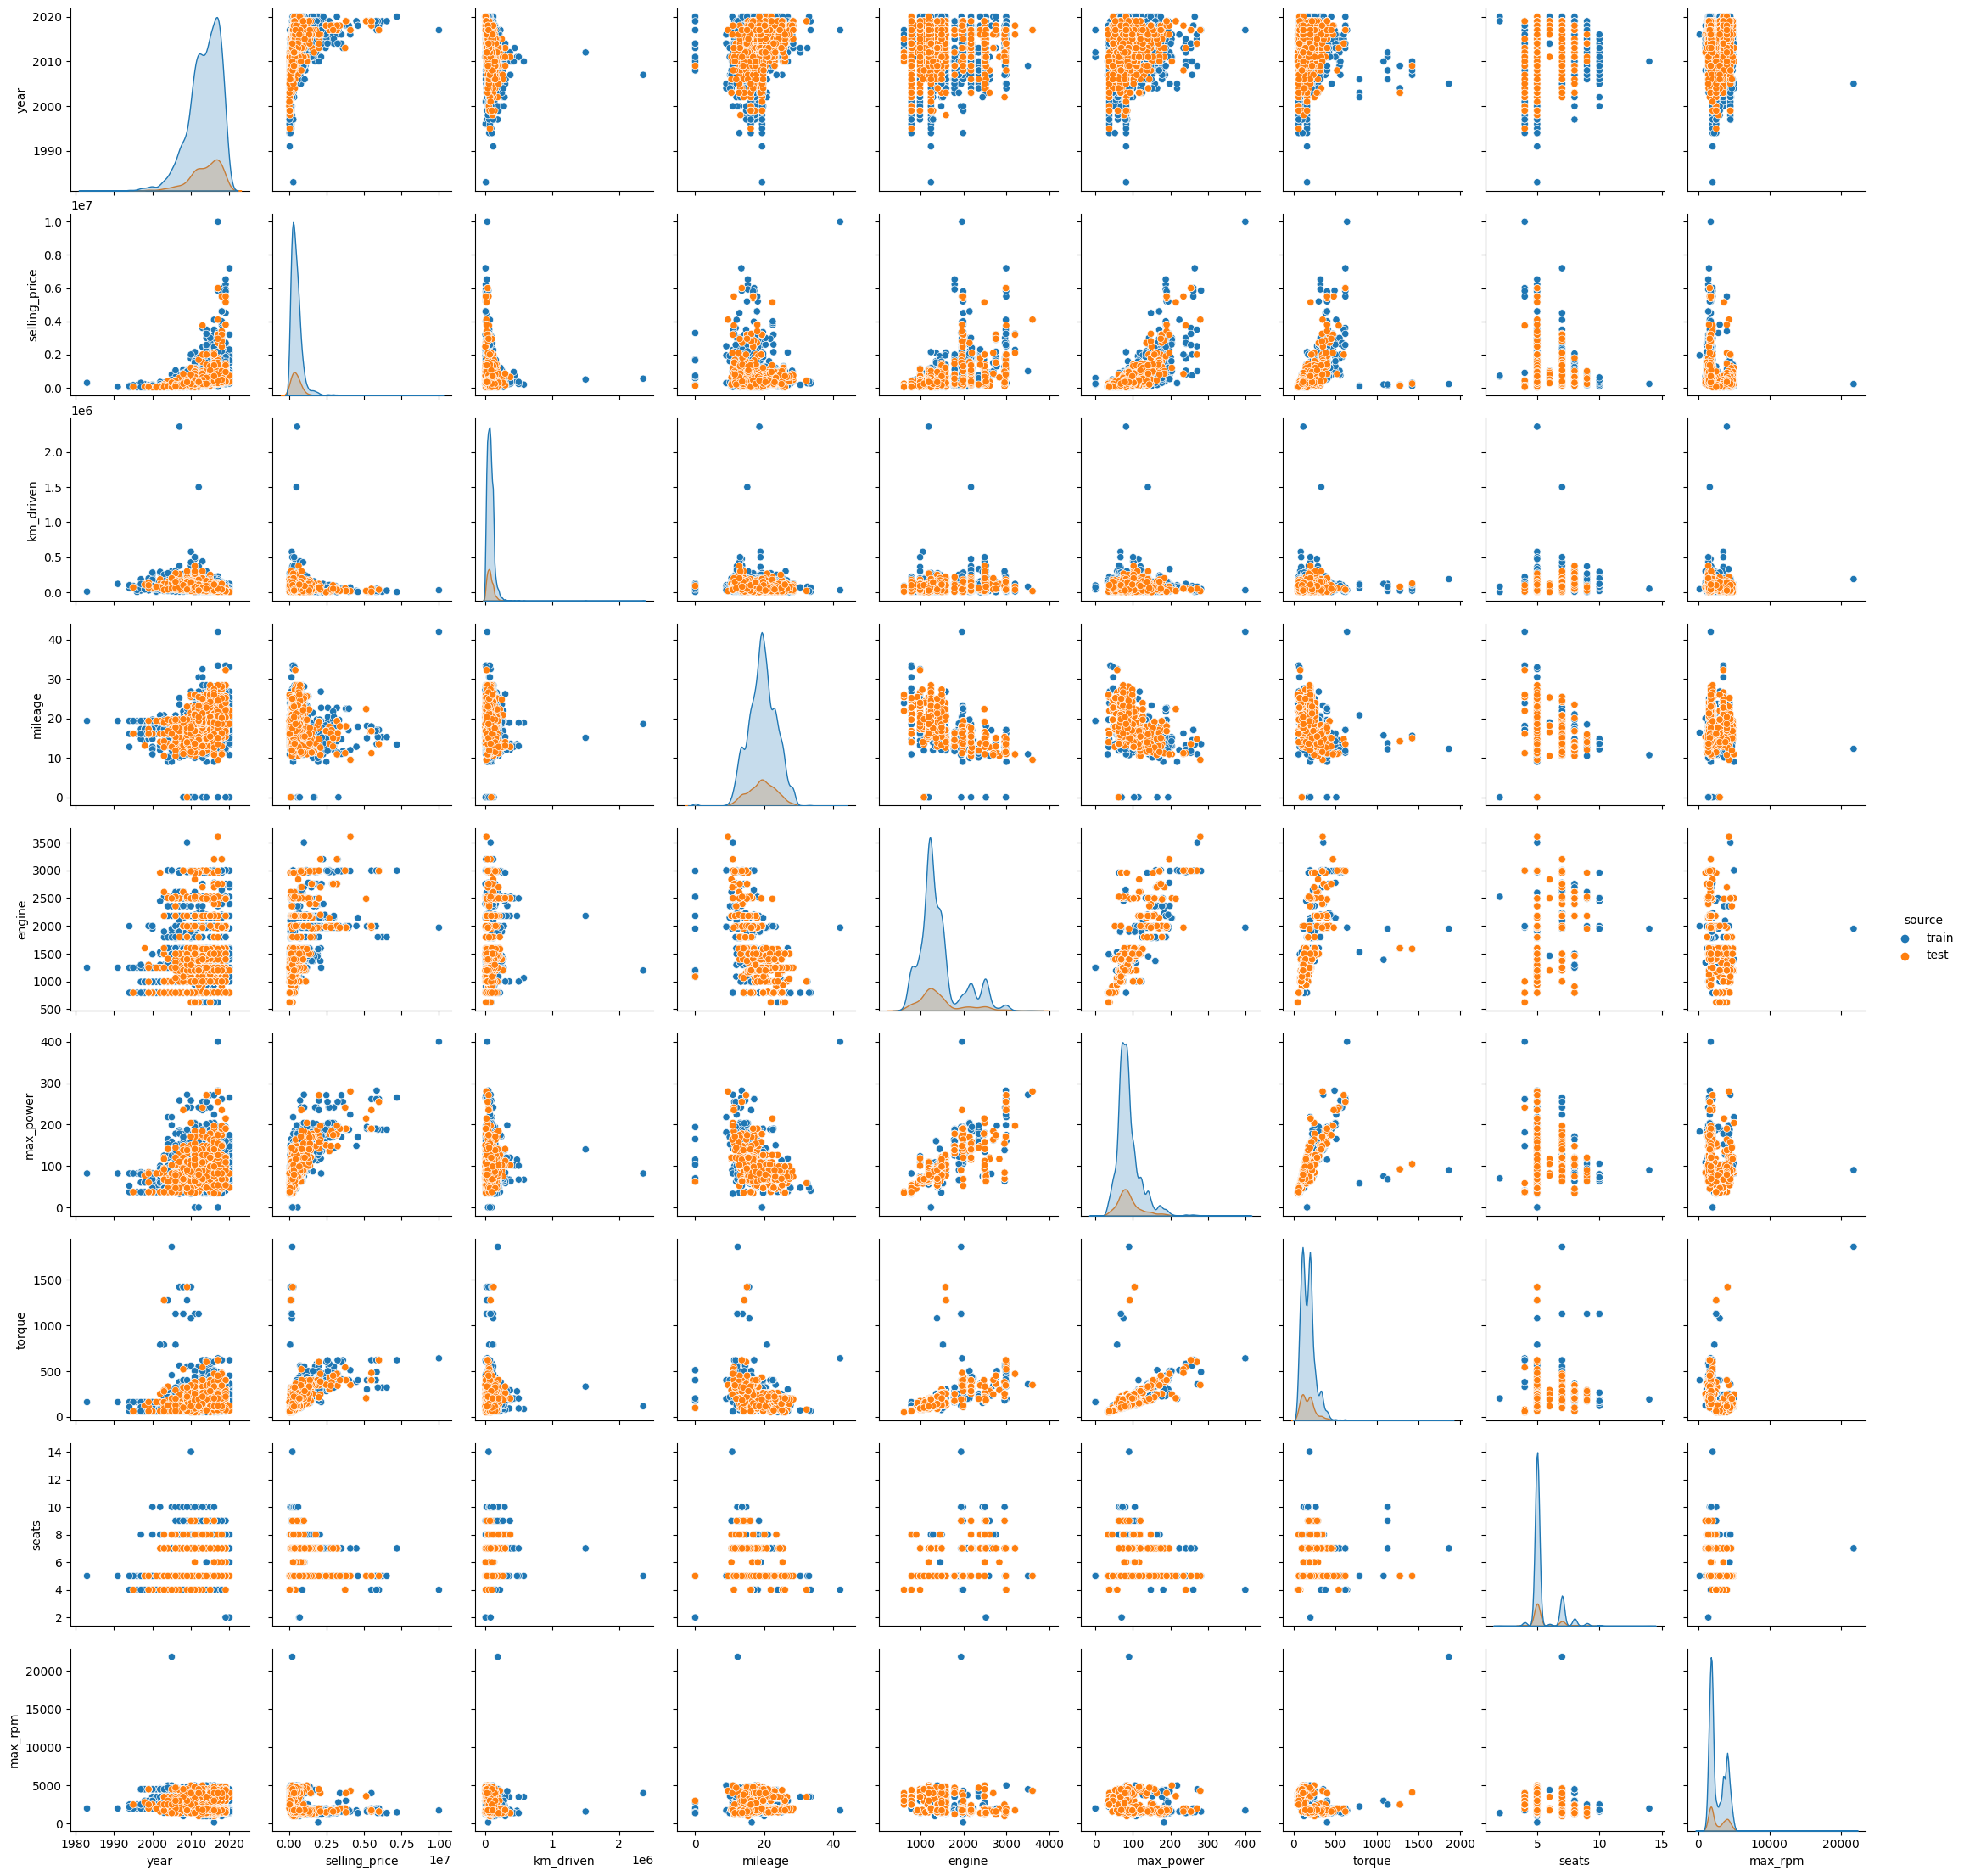

In [31]:
train_view = df_train.iloc[:]
train_view["source"] = "train"
test_view = df_test.iloc[:]
test_view["source"] = "test"
merged_data = pd.concat([train_view, test_view])
sns.pairplot(data=merged_data, hue="source")

Сильных отличий между распределениями не заметно, распределения данных также похожи, если не учитывать соотношение размеров трейна и теста

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

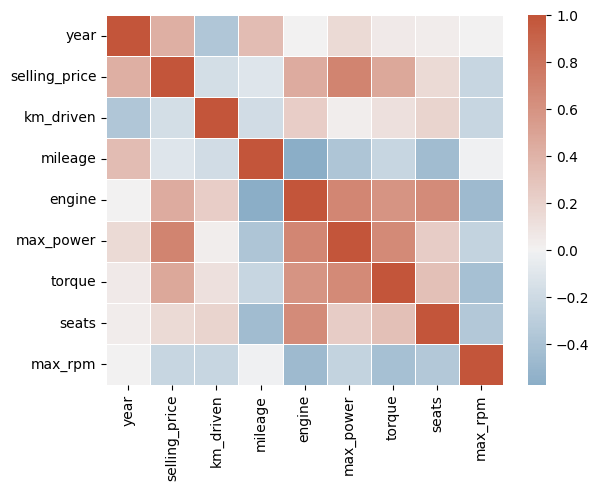

In [32]:
corr = df_train.corr()
cmap = sns.diverging_palette(240, 20, as_cmap=True, n=9)
sns.heatmap(corr, cmap=cmap, linewidths=.5, center=0.0)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

* Самая низкая корреляция у года производства атомобиля и объема двигателя. (0.003)
* Сильная корреляция есть между ценой и максимальной мощностью двигателя,
  также есть положительная корреляция между объемом двигателя и максимальной мощностью, крутящим моментом и  количеством мест.
* Да, чем раньше произведена машина, тем больше у нее пробег на момент продажи. На это указывает отрицательная корреляция между годом и пробегом = -0.369 

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

In [33]:
feature_corr_mat = corr.drop(labels="selling_price").drop(columns="selling_price")
mat = feature_corr_mat.to_numpy()

In [34]:
mat_wo_diag = mat - np.diag(np.ones(mat.shape[0], dtype=np.float64))
amax = np.argmax(np.abs(mat_wo_diag))
row, col = (amax // mat.shape[0], amax % mat.shape[0])
f1, f2 = feature_corr_mat.columns[[row, col]]

<AxesSubplot:xlabel='engine', ylabel='max_power'>

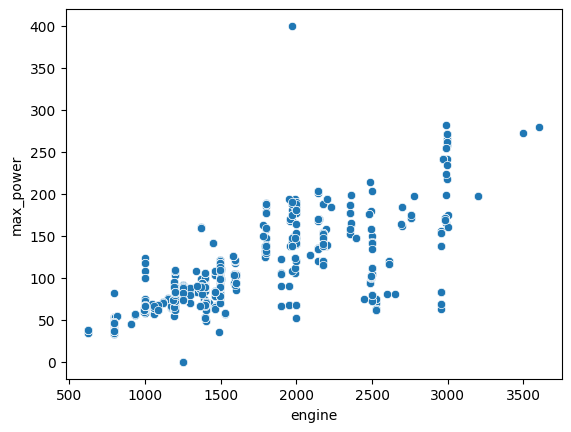

In [35]:
sns.scatterplot(data=df_train, x=f1, y=f2)

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [36]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [37]:
y_train = df_train.selling_price
X_train = df_train._get_numeric_data().drop(columns=["selling_price", "torque", "max_rpm"])

In [38]:
assert X_train.shape == (5840, 6)

In [39]:
y_test = df_test.selling_price
X_test = df_test._get_numeric_data().drop(columns=["selling_price", "torque", "max_rpm"])

In [40]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


def show_stats(model, x_test, y_test):
    prediction = model.predict(x_test)
    print(f"R2: {r2_score(y_test, prediction)}")
    print(f"MSE: {MSE(y_test, prediction)}")

In [42]:
reg = LinearRegression().fit(X_train, y_train)
show_stats(reg, X_test, y_test)

R2: 0.5941419794788387
MSE: 233298779730.45724


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

reg_model = LinearRegression()
reg = Pipeline(steps=[("scaler", StandardScaler()),("regression", reg_model)])
reg.fit(X_train, y_train)
show_stats(reg, X_test, y_test)

R2: 0.5941419794788521
MSE: 233298779730.44962


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [44]:
def feature_importance_scaled(model, x):
    scaled_reg=model.named_steps['regression']
    
    feature_names = x.columns.to_list()
    feature_weights = scaled_reg.coef_
    
    feature_pairs_sorted = sorted(zip(feature_names, feature_weights), key=lambda x: abs(x[1]), reverse=True)
    return dict(feature_pairs_sorted)

In [45]:
feature_importance_scaled(reg, X_train)

{'max_power': 322807.35325923306,
 'year': 152772.57084581672,
 'engine': 61178.494336847834,
 'km_driven': -44158.81852005291,
 'mileage': 28833.925777517143,
 'seats': -23209.13248599739}

Видно, что максимальная мощность двигателя является лучшим предиктором цены, что согласуется с полученной прежде информацией о корреляции признаков

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [46]:
from sklearn.linear_model import Lasso

reg = Pipeline(steps=[("scaler", StandardScaler()),("regression", Lasso())])
reg.fit(X_train, y_train)
show_stats(reg, X_test, y_test)
reg_model.coef_

R2: 0.5941408124026639
MSE: 233299450599.16916


array([152772.57084582, -44158.81852005,  28833.92577752,  61178.49433685,
       322807.35325923, -23209.132486  ])

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

Нет, для такого большого значения целевой переменной веса регуляризации недостаточно. Квадрат ошибки предсказания перевешивает l1-функцию потерь. Нужно подобрать параметр $\alpha$

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [47]:
from sklearn.model_selection import GridSearchCV

reg = Pipeline(steps=[("scaler", StandardScaler()),("regression", Lasso())])
params = {"regression__alpha": [10 ** i for i in range(7)]}
gridsearch = GridSearchCV(estimator=reg, param_grid=params, verbose=True, cv=10)
gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regression', Lasso())]),
             param_grid={'regression__alpha': [1, 10, 100, 1000, 10000, 100000,
                                               1000000]},
             verbose=True)

In [48]:
best_model = gridsearch.best_estimator_
show_stats(best_model, X_test, y_test)
feature_importance_scaled(best_model, X_test)

R2: 0.5815938080475194
MSE: 240511826990.22617


{'max_power': 329230.1475717448,
 'year': 151810.98386365696,
 'km_driven': -32735.11356628615,
 'engine': 17841.622334842537,
 'mileage': 9285.997922052498,
 'seats': -0.0}

In [49]:
best_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('regression', Lasso(alpha=10000))],
 'verbose': False,
 'scaler': StandardScaler(),
 'regression': Lasso(alpha=10000),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'regression__alpha': 10000,
 'regression__copy_X': True,
 'regression__fit_intercept': True,
 'regression__max_iter': 1000,
 'regression__normalize': 'deprecated',
 'regression__positive': False,
 'regression__precompute': False,
 'regression__random_state': None,
 'regression__selection': 'cyclic',
 'regression__tol': 0.0001,
 'regression__warm_start': False}

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

Было обучено 70 моделей - 7 значений параметра и 10 фолдов на каждое значение. В итоге была отобрана модель с параметром регуляризации $\alpha=10000$. При таком параметре занулился коэффициент при количестве мест

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [50]:
from sklearn.linear_model import ElasticNet

reg = Pipeline(steps=[("scaler", StandardScaler()),("regression", ElasticNet())])
params = {"regression__alpha": [10 ** i for i in range(7)],
          "regression__l1_ratio": [0.1 *i for i in range(11)]}
gridsearch = GridSearchCV(estimator=reg, param_grid=params, cv=10)
gridsearch.fit(X_train, y_train)

/home/dm12h/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.052e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/dm12h/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.110e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers

/home/dm12h/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.732e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/dm12h/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.151e+14, tolerance: 1.550e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers

/home/dm12h/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.596e+14, tolerance: 1.521e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/dm12h/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.669e+14, tolerance: 1.535e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers

/home/dm12h/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.986e+14, tolerance: 1.597e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/dm12h/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.535e+14, tolerance: 1.507e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers

/home/dm12h/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.993e+14, tolerance: 1.599e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/dm12h/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regression', ElasticNet())]),
             param_grid={'regression__alpha': [1, 10, 100, 1000, 10000, 100000,
                                               1000000],
                         'regression__l1_ratio': [0.0, 0.1, 0.2,
                                                  0.30000000000000004, 0.4, 0.5,
                                                  0.6000000000000001,
                                                  0.7000000000000001, 0.8, 0.9,
                                                  1.0]})

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [51]:
best_model = gridsearch.best_estimator_
show_stats(best_model, X_test, y_test)
feature_importance_scaled(best_model, X_test)

R2: 0.5722296793169412
MSE: 245894595583.23688


{'max_power': 281553.75282181066,
 'year': 145991.7076021063,
 'engine': 79236.68054915387,
 'km_driven': -46026.44130357328,
 'seats': -24513.52612257991,
 'mileage': 22873.497245802817}

In [52]:
best_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('regression', ElasticNet(alpha=1, l1_ratio=0.9))],
 'verbose': False,
 'scaler': StandardScaler(),
 'regression': ElasticNet(alpha=1, l1_ratio=0.9),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'regression__alpha': 1,
 'regression__copy_X': True,
 'regression__fit_intercept': True,
 'regression__l1_ratio': 0.9,
 'regression__max_iter': 1000,
 'regression__normalize': 'deprecated',
 'regression__positive': False,
 'regression__precompute': False,
 'regression__random_state': None,
 'regression__selection': 'cyclic',
 'regression__tol': 0.0001,
 'regression__warm_start': False}

Наилучшей комбинацией гиперпараметров оказалось дефолтное значение $\alpha=0.9$ для коэффициента L1 регуляризации и $\beta=0.1$ - для коэффициента L2 регуляризации, если представить формулу функции потерь как:
$$L(w) = \dfrac{1}{2 * n\_samples} \cdot \lVert y - Wx \rVert^2_2 + \alpha \lVert W \rVert_1 + 0.5\beta \lVert W \rVert^2_2$$

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [53]:
X_train_cat = df_train.drop(columns=["selling_price", "name", "max_rpm", "torque"])
X_test_cat = df_test.drop(columns=["selling_price", "name", "max_rpm", "torque"])

In [54]:
X_train_cat.select_dtypes(include=np.number).columns.to_list()

['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

In [55]:
assert X_train_cat.shape == (5840, 10)

In [56]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [57]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
from sklearn.compose import ColumnTransformer

cat_data = X_train_cat.select_dtypes(include=['object'])
encoder = OneHotEncoder(drop="first")
encoder.fit(cat_data)
encoder.transform(cat_data)

<5840x10 sparse matrix of type '<class 'numpy.float64'>'
	with 18611 stored elements in Compressed Sparse Row format>

In [58]:
def get_mixed_preprocessor(df):
    numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
    print(f"numeric columns :{numeric_columns}")
    categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
    print(f"categorical columns :{categorical_columns}")

    preproc = ColumnTransformer(transformers=[
        ("numerical", StandardScaler(), numeric_columns),
        ("categorical", OneHotEncoder(drop="first"), categorical_columns)])
    return preproc
preproc = get_mixed_preprocessor(X_train_cat)

numeric columns :['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
categorical columns :['fuel', 'seller_type', 'transmission', 'owner']


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

reg = Pipeline(steps=[("preprocessor", preproc), ("regression", Ridge())])
params = {"regression__alpha": [10 ** i for i in range(7)]}
gridsearch = GridSearchCV(estimator=reg, param_grid=params, cv=10)
gridsearch.fit(X_train_cat, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'km_driven',
                                                                          'mileage',
                                                                          'engine',
                                                                          'max_power',
                                                                          'seats']),
                                                                        ('categorical',
                                                                         OneHotEncoder(drop='first'),
                                               

In [60]:
def _extract_feature_name(val):
    ftype, descr = val.split("__")
    if ftype == "numerical":
        return descr
    fname, exact_val = descr.rsplit("_", 1)
    return fname


def feature_importance_full(model, x):
    weight_dict = dict()
    feature_names_full = model.named_steps['preprocessor'].get_feature_names_out()
    feature_weights = model.named_steps["regression"].coef_
    for feature, val in zip(feature_names_full, feature_weights):
        feature_name = _extract_feature_name(feature)
        val = max(weight_dict.get(feature_name, 0), abs(val))
        weight_dict[feature_name] = val
    feature_pairs_sorted = sorted(weight_dict.items(), key=lambda x: abs(x[1]), reverse=True)
    return dict(feature_pairs_sorted)

In [61]:
best_model = gridsearch.best_estimator_
show_stats(best_model, X_test_cat, y_test)
feature_importance_full(best_model, X_test_cat)

R2: 0.6332681872967936
MSE: 210807918202.85266


{'max_power': 276468.7192653321,
 'transmission': 255296.75000141637,
 'year': 135432.5623905444,
 'owner': 127650.00616860644,
 'seller_type': 106037.11282577614,
 'engine': 48286.93481844292,
 'fuel': 39095.5635418583,
 'km_driven': 37358.213432294244,
 'mileage': 21262.232950465943,
 'seats': 13886.825014500422}

In [62]:
best_model.named_steps["regression"].get_params()

{'alpha': 100,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

# Часть 4 - бонусная (2 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

### Попробуем cгенерировать нелинейные зависимости целевой переменной:

По графикам кросс-корреляции можно заметить, что зависимость целевой переменной от года производства выглядит квадратично, отрицательную зависимость цены от пробега тоже можно аппроксимировать параболой.
Создадим нелинейные признаки:

In [63]:
def add_nonlinearity(df):
    df["km_driven_sq"] = df.km_driven.map(lambda x: x ** 2)
    df["year_squared"] = df.year.map(lambda x: x ** 2)
    return df

Кажется, что оптимально представляет нелинейность для величины пробега функция вида 1/x, но модель в таком случае превращается в константу, даже после попыток избавиться от возможной коллинеарности. Поэтому приходится выбрать простую параболу для обеих переменных

In [64]:
df_train = add_nonlinearity(df_train)
df_test = add_nonlinearity(df_test)
X_train_cat = df_train.drop(columns=["selling_price", "name", "max_rpm", "torque"])
X_test_cat = df_test.drop(columns=["selling_price", "name", "max_rpm", "torque"])

In [65]:
preproc = get_mixed_preprocessor(X_train_cat)
reg = Pipeline(steps=[("preprocessor", preproc), ("regression", Ridge())])
params = {"regression__alpha": [10 ** i for i in range(7)]}
gridsearch = GridSearchCV(estimator=reg, param_grid=params, cv=10)
gridsearch.fit(X_train_cat, y_train)
best_model = gridsearch.best_estimator_
show_stats(best_model, X_test_cat, y_test)
feature_importance_full(best_model, X_test_cat)

numeric columns :['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'km_driven_sq', 'year_squared']
categorical columns :['fuel', 'seller_type', 'transmission', 'owner']
R2: 0.6370148344685294
MSE: 208654238420.63693


{'max_power': 273235.52601295884,
 'transmission': 249851.59544930182,
 'owner': 127777.29619731569,
 'seller_type': 100601.98659122796,
 'km_driven': 79429.46527310103,
 'year_squared': 66792.78171259763,
 'year': 60224.19615693129,
 'engine': 52386.385579648486,
 'km_driven_sq': 50798.97453122594,
 'fuel': 48713.89278354359,
 'mileage': 19410.602735433666,
 'seats': 13107.668527521062}

Улучшение не очень большое, но заметно нембольшое снижение MSE. Добавим теперь переменную torque, которую мы создали в начале ноутбука, но пока не использовали

### Добавим в модель torque

In [66]:
X_train_cat = df_train.drop(columns=["selling_price", "name"])
X_test_cat = df_test.drop(columns=["selling_price", "name"])
preproc = get_mixed_preprocessor(X_train_cat)
reg = Pipeline(steps=[("preprocessor", preproc), ("regression", Ridge())])
params = {"regression__alpha": [10 ** i for i in range(7)]}
gridsearch = GridSearchCV(estimator=reg, param_grid=params, cv=10)
gridsearch.fit(X_train_cat, y_train)
best_model = gridsearch.best_estimator_
show_stats(best_model, X_test_cat, y_test)
feature_importance_full(best_model, X_test_cat)

numeric columns :['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_rpm', 'km_driven_sq', 'year_squared']
categorical columns :['fuel', 'seller_type', 'transmission', 'owner']
R2: 0.6422074075000159
MSE: 205669399164.9003


{'max_power': 264087.481288914,
 'transmission': 245913.83429394948,
 'owner': 123444.92311299784,
 'seller_type': 98828.25060977034,
 'max_rpm': 79631.13198732959,
 'km_driven': 77179.39426392283,
 'year_squared': 70255.0719247963,
 'year': 63947.715086524215,
 'fuel': 55604.03821597734,
 'km_driven_sq': 49946.00759264605,
 'engine': 45142.39338473646,
 'torque': 22197.36343127049,
 'seats': 19526.460531667803,
 'mileage': 16599.69569497918}

Мы получили прирост в пол-процента на R2, не совсем бесполезно

### Добавим в модель информацию о марке и модели машины

In [67]:
def get_model_info(column):
    maker, model, *_ = column.split(" ")
    return maker, model

car_models_train = set(df_train.name.map(get_model_info).unique())
car_models_test = set(df_test.name.map(get_model_info).unique())

print(car_models_test - car_models_train)

car_makers_train = set(df_train.name.map(lambda x: get_model_info(x)[0]).unique())
car_makers_test = set(df_test.name.map(lambda x: get_model_info(x)[0]).unique())

print(car_makers_test - car_makers_train)

{('BMW', 'X5'), ('Ashok', 'Leyland'), ('Volvo', 'XC60'), ('Opel', 'Astra'), ('Skoda', 'Kodiaq')}
{'Opel', 'Ashok'}


Как можно заметить, не все модели представлены в обучающей выборке. Чтобы было проще работать с пропущенными значениями, попробуем использовать target encoding, и будем использовать среднее по производителю/по датасету

In [82]:
class CarEncoder:
    def __init__(self, base_df):
        self.stats = {
            "all": base_df.selling_price.mean()
        }
        manufacturers, models = zip(*base_df.name.map(get_model_info))
        temp_df = base_df.assign(manufacturer=manufacturers, model=models)
        for manufacturer in temp_df.manufacturer.unique():
            manufacturer_slice = temp_df[temp_df.manufacturer == manufacturer]
            maker_price = manufacturer_slice.selling_price.mean()
            self.stats[manufacturer] = {"all": maker_price}
            for model in manufacturer_slice.model.unique():
                model_price = manufacturer_slice[manufacturer_slice.model == model].selling_price.mean()
                self.stats[manufacturer][model] = model_price
    
    def transform(self, df):
        manufacturer_correction = []
        model_correction = []
        
        avg = self.stats["all"]
        for manufacturer, model in df.name.map(get_model_info):
            manufacturer_stats = self.stats.get(manufacturer, None)
            if manufacturer_stats is None:
                manufacturer_correction.append(0)
                model_correction.append(0)
                continue
            manufac_avg = manufacturer_stats["all"]
            manufacturer_correction.append(manufac_avg-avg)
            model_avg = manufacturer_stats.get(model, None)
            if model_avg is None:
                model_correction.append(0)
            else:
                model_correction.append(model_avg - manufac_avg)
        processed_df = df.assign(manufacturer=manufacturer_correction, model=model_correction)
        return processed_df.drop(columns="name")

In [83]:
car_encoder = CarEncoder(df_train)
X_train_full = car_encoder.transform(df_train.drop(columns="selling_price"))
X_test_full = car_encoder.transform(df_test.drop(columns="selling_price"))

In [85]:
preproc = get_mixed_preprocessor(X_train_full)
reg = Pipeline(steps=[("preprocessor", preproc), ("regression", Ridge())])
params = {"regression__alpha": [10 ** i for i in range(7)]}
gridsearch = GridSearchCV(estimator=reg, param_grid=params, cv=10)
gridsearch.fit(X_train_full, y_train)
best_model = gridsearch.best_estimator_
show_stats(best_model, X_test_full, y_test)
feature_importance_full(best_model, X_test_full)

numeric columns :['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_rpm', 'km_driven_sq', 'year_squared', 'manufacturer', 'model']
categorical columns :['fuel', 'seller_type', 'transmission', 'owner']
R2: 0.903241794313428
MSE: 55619379620.97968


{'owner': 1649555.3598996194,
 'manufacturer': 312438.595093187,
 'year_squared': 252900.1423049202,
 'model': 234506.83820295034,
 'year': 163773.18998398792,
 'transmission': 92360.06351573988,
 'fuel': 73314.62569768174,
 'km_driven': 59408.858099070065,
 'seller_type': 42048.30675880612,
 'km_driven_sq': 36914.075391378545,
 'max_power': 33884.27312319108,
 'max_rpm': 23953.926721273016,
 'torque': 9891.120183379568,
 'engine': 6073.100829302083,
 'seats': 4436.349059709367,
 'mileage': 1106.9486678050414}

Кажется, неплохой прирост. Остановимся на нем. Теперь построим модель, чтобы её можно было использовать в сервисе

In [136]:
column_order = df_train.columns.to_list()
tuple(column_order[:-3])

('name',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'seats')

In [141]:
class PredictionModel:

    def __init__(self, model, encoder, columns, medians):
        self.model = model
        self.car_encoder = encoder
        self.columns = columns
        self.medians = medians

    def predict(self, df):
        clean_data = clean_up_data(df)
        nonlinear_data = add_nonlinearity(clean_data)
        finalized_data = self.car_encoder.transform(nonlinear_data)
        finalized_data.fillna(value=self.medians, inplace=True)
        prediction = self.model.predict(finalized_data)
        return prediction

In [143]:
import pickle
predictor = PredictionModel(best_model, car_encoder, tuple(column_order[:-3]), df_train.median(numeric_only=True))
with open("model.pickle", "wb") as f:
    pickle.dump(predictor, f)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [86]:
def business_metrics(y_true, y_pred):
    low_lim = (y*0.9 for y in y_true)
    high_lim = (y* 1.1 for y in y_true)
    hits= (low <= pred <=high for low, pred, high in zip(low_lim, y_pred, high_lim))
    return sum(hits)/ len(y_pred)

business_metrics(y_test, best_model.predict(X_test_full))

0.305

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link